In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define the directory where the images are stored
train_dir = 'C:/Users/timot/Documents/Projet/ia/chest_Xray/chest_Xray/train'
test_dir = 'C:/Users/timot/Documents/Projet/ia/chest_Xray/chest_Xray/test'

# Define the image data generator
image_generator = ImageDataGenerator(rescale=1./255)

# Define the batch size and image size
initial_batch_size = 64
batch_size = initial_batch_size
img_size=(224,224)
train_datas = []
test_datas = []
for i in range (5):
    print(batch_size)
    # Load the train images using the flow_from_directory method
    train_data = image_generator.flow_from_directory(
            train_dir,
            batch_size = batch_size,
            target_size = img_size,
            class_mode = 'categorical'
    )

    # Load the test images using the flow_from_directory method
    test_data = image_generator.flow_from_directory(
            test_dir,
            batch_size = batch_size,
            target_size = img_size,
            class_mode = 'categorical'
    )
    
    train_datas.append(train_data)
    test_datas.append(test_data)
    batch_size = batch_size*2

64
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
128
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
256
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
512
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
1024
Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [11]:
import tensorflow as tf
import json

file_number = '6'
acc_batch_array = []
loss_batch_array = []
history_acc_log = {}
history_loss_log = {}

for n in range (len(train_datas)):
    x_train, y_train = next(train_datas[n])
    x_test, y_test = next(test_datas[n])
    print(len(x_train))

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
    model.add(tf.keras.layers.Dense(2, activation=tf.nn.softmax))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy']
                  )

    acc_epochs_array = []
    loss_epochs_array = []
    list_epochs = []
    for i in range (5):
        epochs = (i+1)*10
        list_epochs.append(epochs)
        
        history = model.fit(x_train, y_train, epochs=epochs, verbose=1, shuffle=True, validation_data=(x_test, y_test))
        history_acc_log['b'+str(len(x_train))+'e'+str(epochs)] = history.history['accuracy']
        history_loss_log['b'+str(len(x_train))+'e'+str(epochs)] = history.history['loss']
        print(history.history['accuracy'])
        print(history.history['loss'])
        val_loss, val_acc = model.evaluate(x_test, y_test)
        acc_epochs_array.append(val_acc)
        loss_epochs_array.append(val_loss)
    
    acc_batch_array.append(acc_epochs_array)
    loss_batch_array.append(loss_epochs_array)

fileAcc = open("images/ultimate_test/dictAcc"+file_number+".txt", "w")
fileLoss = open("images/ultimate_test/dictLoss"+file_number+".txt", "w")
json.dump(history_acc_log, fileAcc)
json.dump(history_loss_log, fileLoss)
fileAcc.close()
fileLoss.close()


64
Epoch 1/10
2/2 [==============================] - 1s 408ms/step - loss: 18.7773 - accuracy: 0.4688 - val_loss: 26.8733 - val_accuracy: 0.4688
Epoch 2/10
2/2 [==============================] - 0s 250ms/step - loss: 24.2338 - accuracy: 0.4688 - val_loss: 22.2517 - val_accuracy: 0.5312
Epoch 3/10
2/2 [==============================] - 0s 256ms/step - loss: 8.1699 - accuracy: 0.5781 - val_loss: 4.2621 - val_accuracy: 0.5312
Epoch 4/10
2/2 [==============================] - 0s 250ms/step - loss: 1.1881 - accuracy: 0.8438 - val_loss: 6.1773 - val_accuracy: 0.4844
Epoch 5/10
2/2 [==============================] - 0s 247ms/step - loss: 5.3145 - accuracy: 0.5469 - val_loss: 19.4826 - val_accuracy: 0.5312
Epoch 6/10
2/2 [==============================] - 0s 240ms/step - loss: 7.5226 - accuracy: 0.7188 - val_loss: 2.8268 - val_accuracy: 0.5781
Epoch 7/10
2/2 [==============================] - 0s 246ms/step - loss: 3.8686 - accuracy: 0.5625 - val_loss: 5.3072 - val_accuracy: 0.6094
Epoch 8/10
2

In [13]:
import matplotlib.pyplot as plt

def plot_acc_arrays(array_list):
    plt.figure(figsize=(16,10))
    title_batch_size = initial_batch_size
    for array in array_list:
        plt.plot(list_epochs, array, label='batch_' + str(title_batch_size))
        title_batch_size = title_batch_size*2
    
    title = 'Epochs accuracy by batch size'
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.xticks(list_epochs)
    plt.ylim([0.5,1])
    plt.grid(True, axis='y')
    plt.savefig('images/ultimate_test/accuracy'+file_number)
    
def plot_loss_arrays(array_list):
    plt.figure(figsize=(16,10))
    title_batch_size = initial_batch_size
    for array in array_list:
        plt.plot(list_epochs, array, label='batch_' + str(title_batch_size))
        title_batch_size = title_batch_size*2
    
    title = 'Epochs loss by batch size'
    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.xticks(list_epochs)
    plt.grid(True, axis='y')
    plt.savefig('images/ultimate_test/loss'+file_number)

[[0.734375, 0.796875, 0.765625, 0.71875, 0.71875], [0.6796875, 0.7734375, 0.7890625, 0.7890625, 0.7890625], [0.75390625, 0.65234375, 0.77734375, 0.765625, 0.76953125], [0.6875, 0.7142857313156128, 0.6964285969734192, 0.7053571343421936, 0.7053571343421936], [0.7980769276618958, 0.7884615659713745, 0.7163461446762085, 0.745192289352417, 0.7435897588729858]]
=====
[[2.5258917808532715, 2.0883729457855225, 2.643988847732544, 3.3663578033447266, 3.4612512588500977], [3.381546974182129, 3.8433563709259033, 2.604222297668457, 2.6244401931762695, 2.6321942806243896], [1.5057010650634766, 5.442220211029053, 1.5250792503356934, 1.703789234161377, 1.7112375497817993], [4.4448933601379395, 2.6553990840911865, 2.9446046352386475, 2.9479432106018066, 3.60724139213562], [0.9649084210395813, 1.1291426420211792, 2.758226156234741, 2.5089848041534424, 2.989337682723999]]


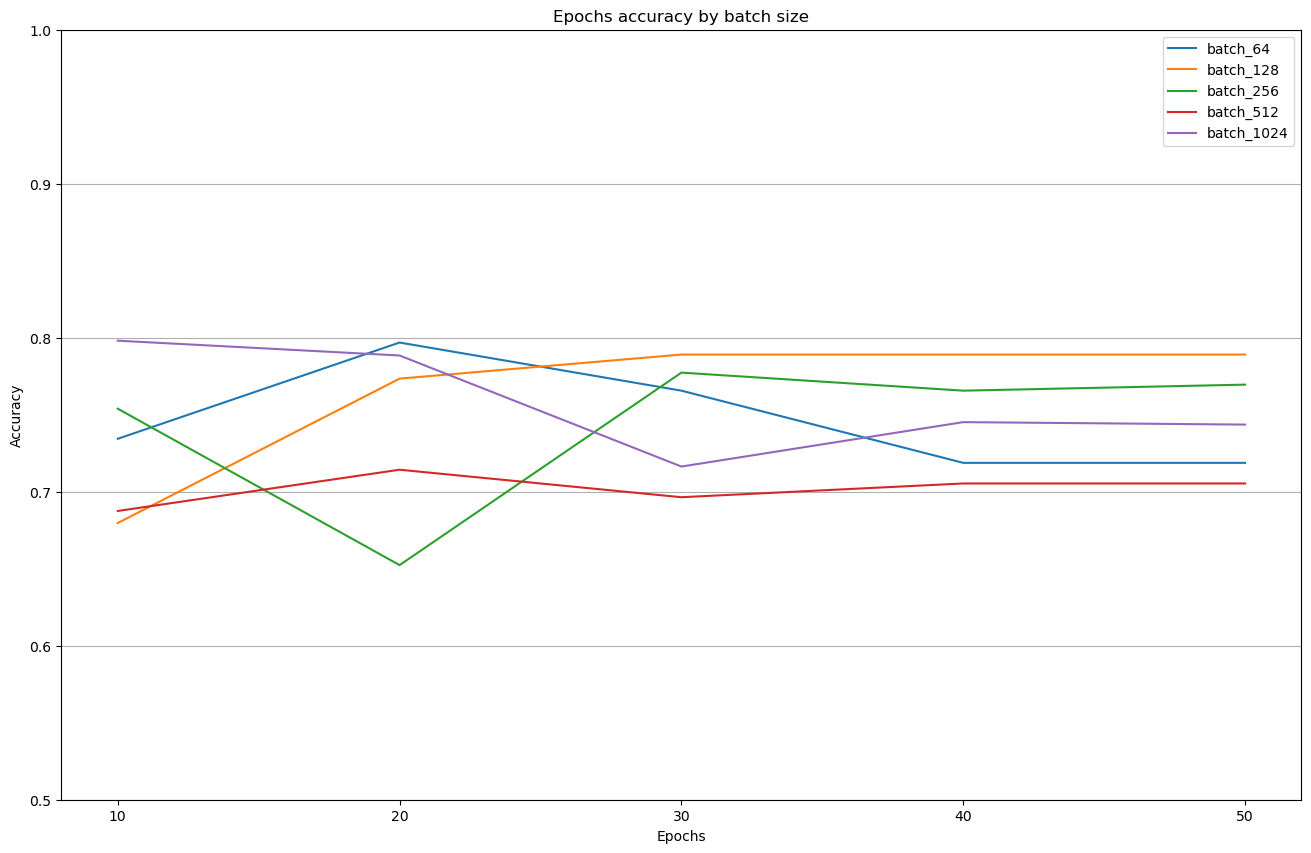

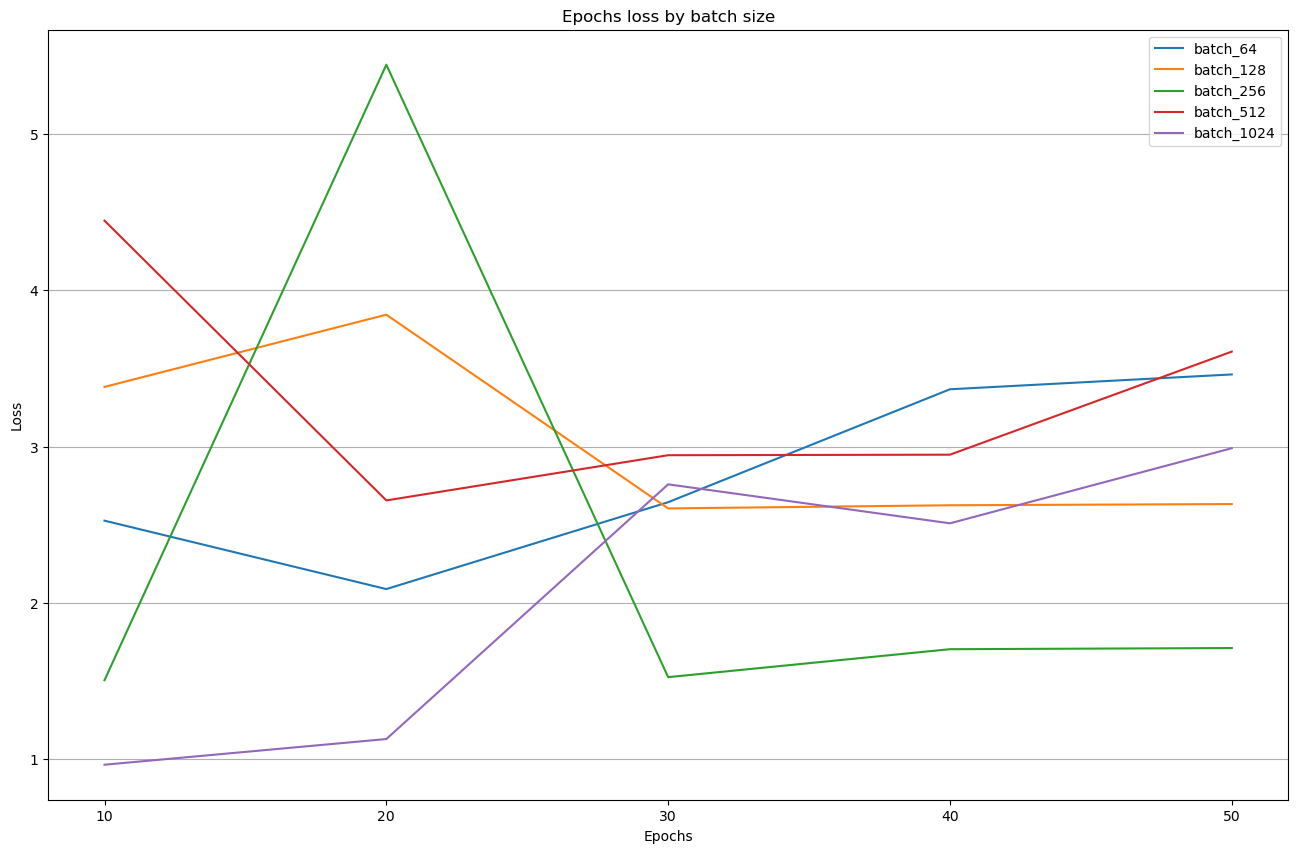

In [14]:
print(acc_batch_array)
plot_acc_arrays(acc_batch_array)
print('=====')
print(loss_batch_array)
plot_loss_arrays(loss_batch_array)

model final